In [51]:
df=spark.read.csv("../RDD/ventas/",
                 header=True,
                 inferSchema=True,
                 timestampFormat="MM/dd/yyyy"
                 )

In [52]:
df.printSchema(),df.show(2)

root
 |-- ProductID: integer (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Units: integer (nullable = true)
 |-- Revenue: double (nullable = true)
 |-- Country: string (nullable = true)

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|      726|1999-01-15 00:00:00|75056 CEDEX 01|    1| 115.45| France|
|     1909|1999-01-15 00:00:00|75056 CEDEX 01|    2|  398.9| France|
+---------+-------------------+--------------+-----+-------+-------+
only showing top 2 rows



(None, None)

In [53]:
df.count()

841147

In [54]:
df.groupBy("Country").count().show()

+-------+------+
|Country| count|
+-------+------+
|Germany|234072|
| France|314750|
| Mexico|217007|
| Canada| 75318|
+-------+------+



In [39]:
from pyspark.sql.functions import year
df.where(year("Date")==1999).groupBy("Country")\
    .sum("Units","Revenue").show()

+-------+----------+-----------------+
|Country|sum(Units)|     sum(Revenue)|
+-------+----------+-----------------+
|Germany|     12363| 5974734.42000092|
| France|     20617|7660595.510002049|
| Mexico|      9991|3447196.620000272|
| Canada|      3964|1382819.917500034|
+-------+----------+-----------------+



In [60]:
dfUSA=spark.read.csv("../RDD/ventasUSA/",
                     sep=";",
                    inferSchema=True)

In [61]:
dfUSA.printSchema();dfUSA.show()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: string (nullable = true)

+---+-------------------+-----+---+--------+
|_c0|                _c1|  _c2|_c3|     _c4|
+---+-------------------+-----+---+--------+
|833|1999-01-15 00:00:00|76108|  1|797,9475|
|837|1999-01-15 00:00:00|33436|  1|813,6975|
|837|1999-01-15 00:00:00|76531|  1|813,6975|
|838|1999-01-15 00:00:00|29526|  1|934,4475|
|838|1999-01-15 00:00:00|33584|  1|944,9475|
|838|1999-01-15 00:00:00|33947|  1|944,9475|
|838|1999-01-15 00:00:00|74132|  1|929,1975|
|838|1999-01-15 00:00:00|75080|  1|944,9475|
|838|1999-01-15 00:00:00|85225|  1|934,4475|
|838|1999-01-15 00:00:00|92647|  1|929,1975|
|838|1999-01-15 00:00:00|92833|  1|934,4475|
|843|1999-01-15 00:00:00|91730|  1|551,1975|
|847|1999-01-15 00:00:00|17701|  1|603,6975|
|847|1999-01-15 00:00:00|71446|  1|577,4475|
|847|1999-01-15 00:00:00|99205|  1|603,6975|
|85

In [68]:
from pyspark.sql.functions import translate,lit
dfU=dfUSA.withColumn("_c2",dfUSA._c2.cast("string"))\
        .withColumn("_c4",translate("_c4",",",".").cast("float"))\
        .withColumn("Country",lit("USA"))
dfU.show(2);dfU.printSchema()

+---+-------------------+-----+---+--------+-------+
|_c0|                _c1|  _c2|_c3|     _c4|Country|
+---+-------------------+-----+---+--------+-------+
|833|1999-01-15 00:00:00|76108|  1|797.9475|    USA|
|837|1999-01-15 00:00:00|33436|  1|813.6975|    USA|
+---+-------------------+-----+---+--------+-------+
only showing top 2 rows

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: float (nullable = true)
 |-- Country: string (nullable = false)



In [75]:
df.printSchema();dfU.printSchema()

root
 |-- ProductID: integer (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Units: integer (nullable = true)
 |-- Revenue: double (nullable = true)
 |-- Country: string (nullable = true)

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: float (nullable = true)
 |-- Country: string (nullable = false)



In [76]:
dfMundial=df.union(dfU)

In [78]:
dfMundial.count(),df.count(),dfU.count()

(1341147, 841147, 500000)

In [88]:
dfP=dfMundial.groupBy("Country")\
.sum("Revenue")\
.orderBy("sum(Revenue)",ascending=False).toPandas()

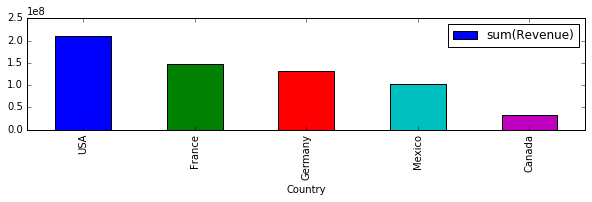

In [91]:
dfP.plot.bar(x="Country",y="sum(Revenue)",figsize=(10,2))